In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits

In [2]:
topdir = "/project/bootcamp/cslage/ats_data/20190416/ptc_kirk_config"

In [11]:
datedir = ''#'20190416'

In [12]:
datadir = os.path.join(topdir, datedir)

In [5]:
outputdir = os.path.join("/home/cslage/WORK/ats", datedir)
if not os.path.isdir(outputdir):
    os.makedirs(outputdir)

In [6]:
def set_legend_outside(ax):
    """
    Operations to put a matplotlib legend outside the plot area.
    :return:
    """
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [13]:
def average_1D_plot(listfile, listchannel, axis, listlabel=None, norm=True, ROIcols=None, ROIrows=slice(10,2000)):
    """
    Basic plot of frames averaging over one direction.
    0 = average over lines, plot versus column
    1 = average over columns, plot versus lines
    """
    fig, ax = plt.subplots(figsize=(10, 6))

    # color scheme
    ndisplay = len(listchannel) * len(listfile)
    color_idx = [plt.cm.jet(i) for i in np.linspace(0, 1, ndisplay)]

    for num, hfile in enumerate(listfile):
        try:
            h = pyfits.open(os.path.join(datadir, hfile))
        except:
            continue
        for c, channel in enumerate(listchannel):
            if ROIcols is None:
                linedata = h[channel+1].data[ROIrows, :].mean(axis=axis)
            else:
                linedata = h[channel+1].data[ROIrows, ROIcols].mean(axis=axis)
            # option to normalize
            if norm:
                linedata = linedata - linedata[-20:].mean()
            if listlabel is None:
                fname = hfile
            else:
                fname = listlabel[num]
            channame = h[channel + 1].header["extname"]
            if len(listfile) > 1 and len(listchannel) > 1:
                filelabel = '%s-%s' % (channame, fname)
            elif len(listfile) > 1:
                filelabel = fname
            else:
                filelabel = '%s' % (channame,)
                # alternative
                # filelabel = num
            ax.plot(linedata, label=filelabel, color=color_idx[num * len(listchannel) + c])
        h.close()
        del h

    set_legend_outside(ax)
    if axis:
        ax.set_xlabel('Image line')
        if norm:
            ax.set_ylabel('Normalized average over columns (ADU)')
        else:
            ax.set_ylabel('Average over columns (ADU)')
    else:
        ax.set_xlabel('Image column')
        if norm:
            ax.set_ylabel('Normalized average over rows (ADU)')
        else:
            ax.set_ylabel('Average over rows (ADU)')
    plt.grid()

    rootname = os.path.split(listfile[0])[-1].split('.')[0]
    if len(listchannel) == 1:
        plt.title(channame)
        rootname += channame
    elif len(listfile) == 1:
        plt.title(listfile[0])
        
    plt.savefig(os.path.join(outputdir, 'lineplot-%s.png' % rootname))
    plt.show()

In [14]:
lf = [f for f in sorted(os.listdir(datadir)) if f[-4:] == "fits"]

In [15]:
lfexp = [f for f in lf if f.split('_')[-1][0] != '0']

In [16]:
lbexp = [f.split('_')[-1].split('.')[0] for f in lfexp]

In [21]:
print(lfexp)
print(len(lfexp))

['AT_C_20190416_000136_exp_10.fits', 'AT_C_20190416_000137_exp_10.fits', 'AT_C_20190416_000138_exp_20.fits', 'AT_C_20190416_000139_exp_20.fits', 'AT_C_20190416_000140_exp_30.fits', 'AT_C_20190416_000141_exp_30.fits', 'AT_C_20190416_000142_exp_40.fits', 'AT_C_20190416_000143_exp_40.fits', 'AT_C_20190416_000144_exp_50.fits', 'AT_C_20190416_000145_exp_50.fits', 'AT_C_20190416_000146_exp_60.fits', 'AT_C_20190416_000147_exp_60.fits', 'AT_C_20190416_000148_exp_70.fits', 'AT_C_20190416_000149_exp_70.fits', 'AT_C_20190416_000150_exp_80.fits', 'AT_C_20190416_000151_exp_80.fits', 'AT_C_20190416_000152_exp_90.fits', 'AT_C_20190416_000153_exp_90.fits', 'AT_C_20190416_000154_exp_100.fits', 'AT_C_20190416_000155_exp_100.fits']
20


In [22]:
# runs for 20190416
run1 = lfexp[0:20:2]
#run2 = lfexp[50:98:2]
#run3 = lfexp[98:146:2]
#run4 = lfexp[146:194:2]

In [25]:
print(run1[0])
h = pyfits.open(os.path.join(datadir, run1[0]))
h[18].header

AT_C_20190416_000136_exp_10.fits


XTENSION= 'BINTABLE'           / marks beginning of new HDU                     
BITPIX  =                    8 / bits per data value                            
NAXIS   =                    2 / number of axes                                 
NAXIS1  =                    0 / size of the n'th axis                          
NAXIS2  =                    0 / size of the n'th axis                          
PCOUNT  =                    0 / Required value                                 
GCOUNT  =                    1 / Required value                                 
TFIELDS =                    0 / Number of table fields                         
CHECKSUM= 'ZddGcdZEZddEbdZE'   / checksum for the current HDU                   
ANALOG_I=                346.9 / Power supply analog current                    
ANALOG_V=                  7.0 / Power supply analog voltage                    
DIGIT_I =                648.0 / Power supply digital current                   
DIGIT_V =                  5

In [26]:
lfbias = [f for f in lf if f.split('_')[-1][0] == '0']

In [27]:
print(lfbias)

['AT_C_20190416_000134_exp_0.fits', 'AT_C_20190416_000135_exp_0.fits']


In [28]:
lfbias = lfbias[0:-1]  # too many: subset

In [29]:
lbbias = [f.split('_')[-3] for f in lfbias]

In [30]:
notchansedge = [1,2,3,4,5,6,9,10,11,12,13,14]
validchans = list(range(7)) + list(range(8,16,1))

In [31]:
rowstart, rowstop, rowover, colstart, colstop, colover = 0, 2000, 2048, 3, 512, 576  

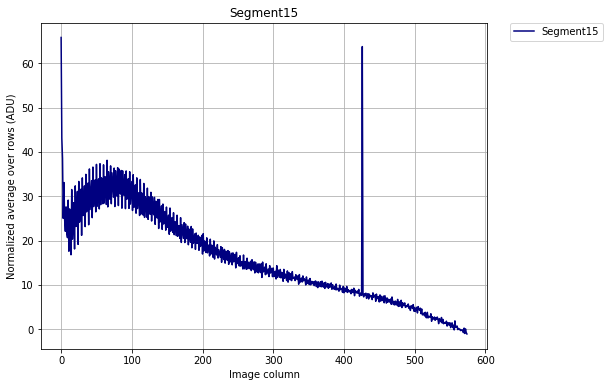

In [32]:
average_1D_plot(lfbias, [5], axis=0, listlabel=lbbias, ROIcols=slice(1, colover), ROIrows=slice(50,1950))

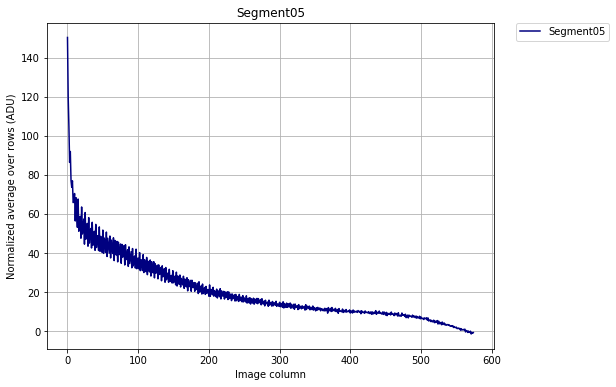

In [33]:
average_1D_plot(lfbias, [10], axis=0, listlabel=lbbias, ROIcols=slice(1, colover), ROIrows=slice(50,1950))

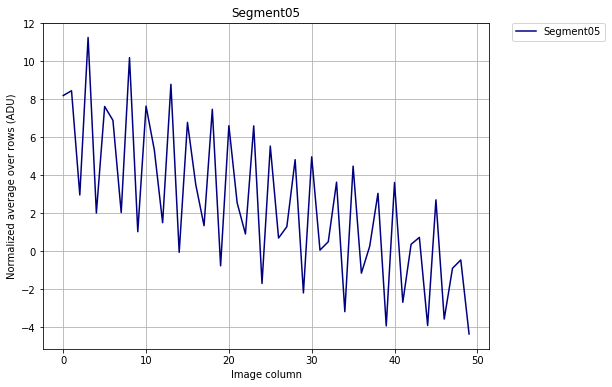

In [34]:
average_1D_plot(lfbias, [10], axis=0, listlabel=lbbias, ROIcols=slice(100, 150), ROIrows=slice(50,1950))

In [35]:
average_1D_plot([lfbias[1]], range(13), axis=0, ROIcols=slice(1, colover), ROIrows=slice(50,1950))

IndexError: list index out of range

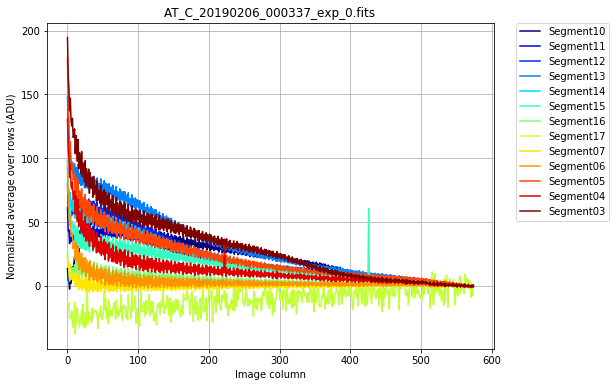

In [21]:
average_1D_plot([lfbias[-10]], range(13), axis=0, ROIcols=slice(1, colover), ROIrows=slice(50,1950))

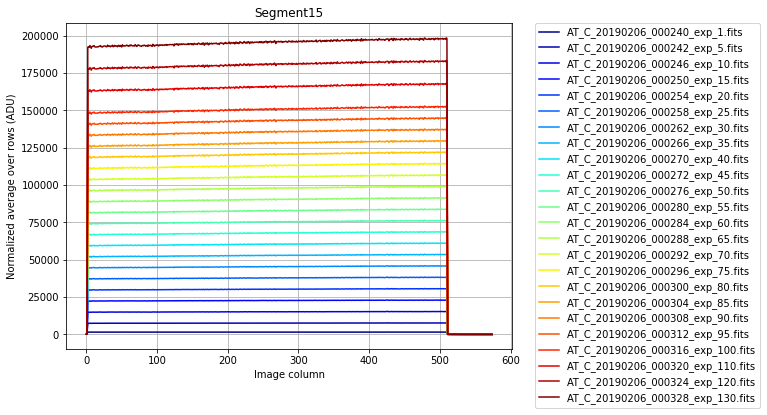

In [18]:
average_1D_plot(run3, [5], axis=0, ROIcols=slice(1, colover), ROIrows=slice(50,1950))

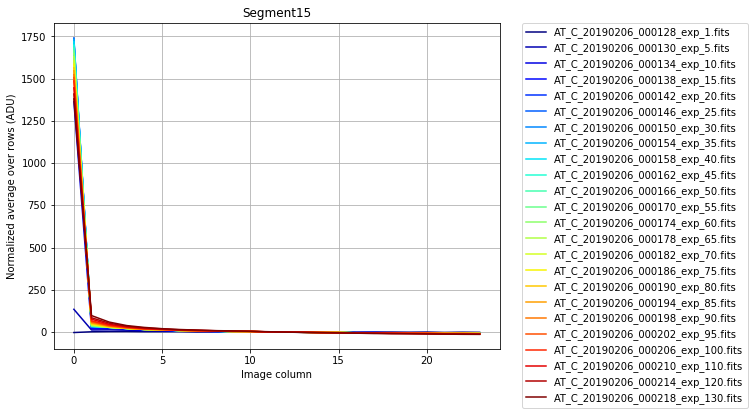

In [19]:
average_1D_plot(run2, [5], axis=0, ROIcols=slice(colstop, colover-40), ROIrows=slice(50,1950))

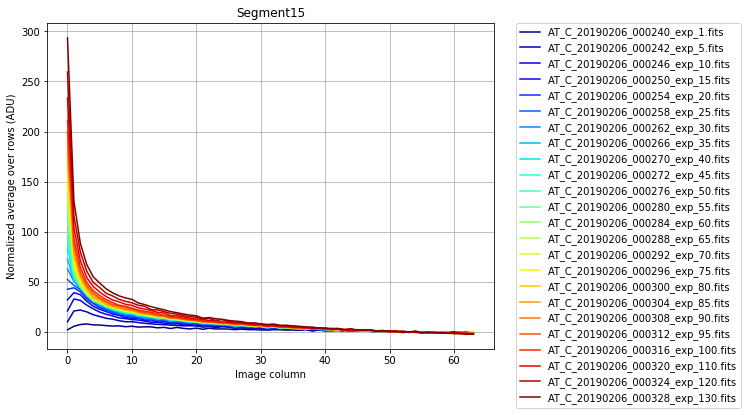

In [20]:
average_1D_plot(run3, [5], axis=0, ROIcols=slice(colstop, colover), ROIrows=slice(50,1950))

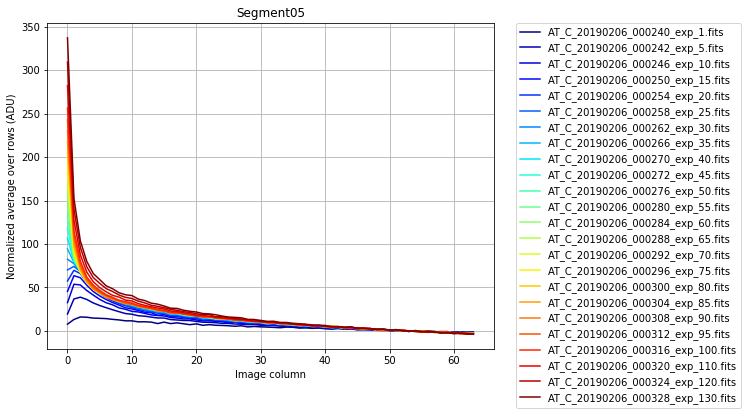

In [21]:
average_1D_plot(run3, [10], axis=0, ROIcols=slice(colstop, colover), ROIrows=slice(50,1950))

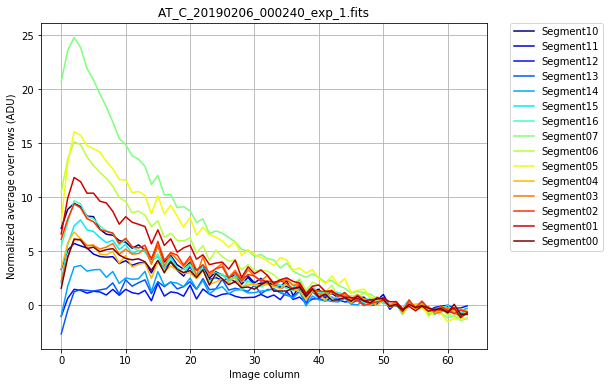

In [27]:
average_1D_plot([run3[0]], validchans, axis=0, ROIcols=slice(colstop, colover), ROIrows=slice(50,1950))

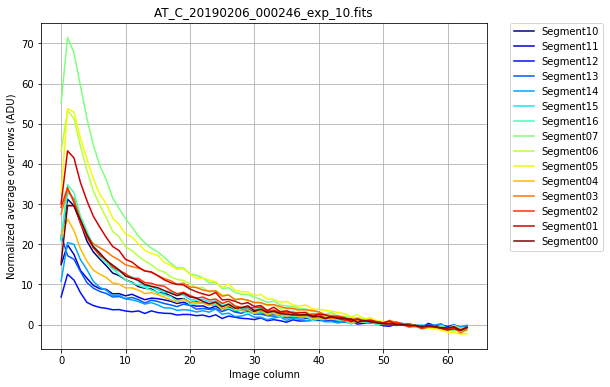

In [28]:
average_1D_plot([run3[2]], validchans, axis=0, ROIcols=slice(colstop, colover), ROIrows=slice(50,1950))

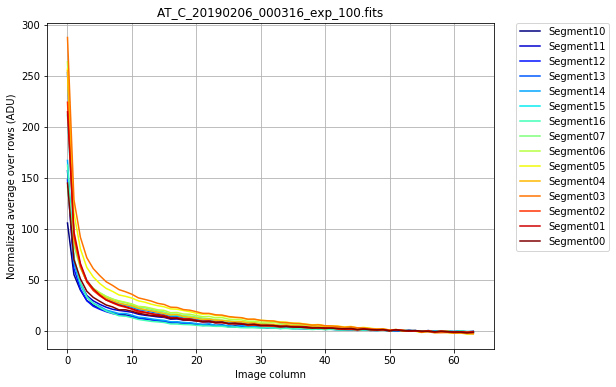

In [29]:
average_1D_plot([run3[20]], validchans, axis=0, ROIcols=slice(colstop, colover), ROIrows=slice(50,1950))

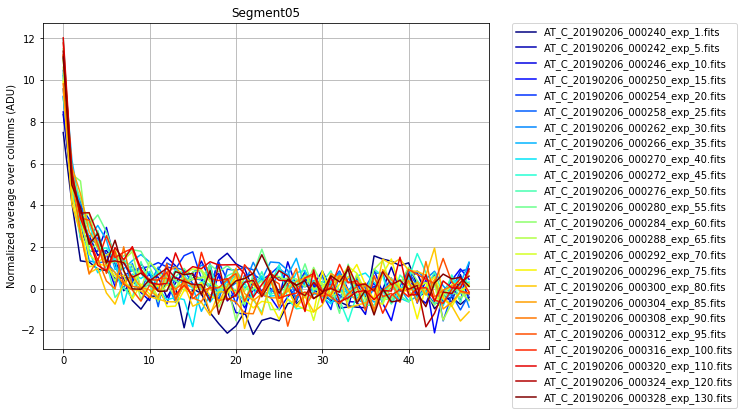

In [19]:
average_1D_plot(run3, [10], axis=1, ROIcols=slice(100, colstop), ROIrows=slice(rowstop, rowover)) 
# variation of bias vs column does not affect result because of normalization

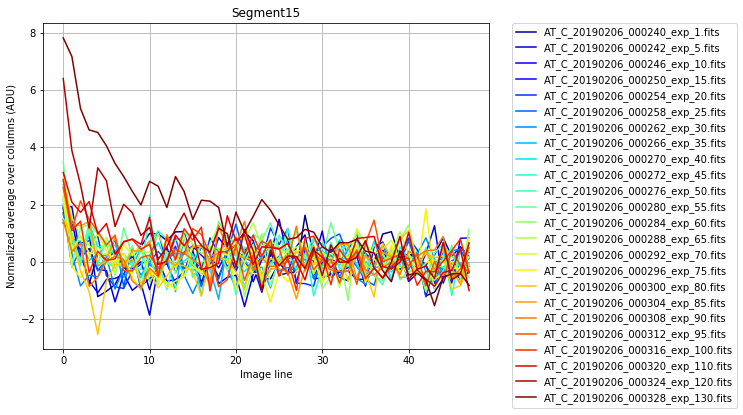

In [20]:
average_1D_plot(run3, [5], axis=1, ROIcols=slice(100, colstop), ROIrows=slice(rowstop, rowover))

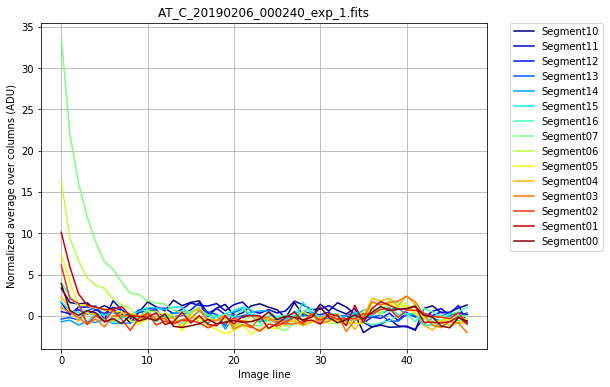

In [25]:
average_1D_plot([run3[0]], validchans, axis=1, ROIcols=slice(100, colstop), ROIrows=slice(rowstop, rowover))

In [36]:
def calc_CTE(fname, output, axis, selectchannels=range(16), verbose=True):
    """
    Computes statistics necessary to calculate serial (axis=0)/parallel (axis=1) CTE and associated effects (electronics and traps in serial
    register).
    """
    hdulist = pyfits.open(os.path.join(datadir, fname))
    if axis==0:
        s = "Channel LastLight StdLight Serial1 StdSerial1 Serial2 StdSerial2 AvgDark StdDark SerialCTI "
    else:
        s = "Channel LastLight StdLight Para1 StdPara1 Para2 StdPara2 AvgDark StdDark ParaCTI "
        
    if os.path.isdir(output):
        if axis==0:
            f = open(os.path.join(output, 'serialcte-%s.txt' % hdulist[0].header["FILENAME"]), 'w')            
        else:
            f = open(os.path.join(output, 'parcte-%s.txt' % hdulist[0].header["FILENAME"]), 'w')                       
        f.write(s + '\n')
    else:
        f = open(output, 'a')

    if verbose:
        print(s)
        
    for ichan in selectchannels:
        hdr = hdulist[ichan+1].header

        if axis==0:
            img = hdulist[ichan + 1].data[rowstart + 50:rowstop - 50, :]  # avoid edge effects
            light = img[:, colstop - 1].mean()
            stdlight = img[:, colstop - 1].std()
            serialdark = img[:, colstop + 20:colover].mean()
            noisedark = img[:, colstop + 20:colover].std()

            serialover = img[:, colstop].mean() - serialdark
            errserial = img[:, colstop].std()  # does not include error on dark
            #  this is to test the reliability of the measure, not an actual error estimate
            serialover2 = img[:, colstop + 1].mean() - serialdark
            errserial2 = img[:, colstop + 1].std()
            signal = light - serialdark  # serialdark is less likely to have stray light and bright columns
            
        else:
            img = hdulist[ichan + 1].data[:, colstart + 50:colstop - 20] # avoid edge effects
            light = img[rowstop - 1, :].mean()
            stdlight = img[rowstop - 1, :].std()
            serialdark = img[rowstop + 10:, :].mean()
            noisedark = img[rowstop + 10:, :].std()

            serialover = img[rowstop, :].mean() - serialdark
            errserial = img[rowstop, :].std()  # does not include error on dark
            #  this is to test the reliability of the measure, not an actual error estimate
            serialover2 = img[rowstop + 1, :].mean() - serialdark
            errserial2 = img[rowstop + 1, :].std()
            signal = light - serialdark  # brute-force: includes bright columns
            
        try:
            serialcte = (serialover / signal) / (colstop + 1)
        except:
            serialcte = 1
            continue
        out = "{:d}     {:10.2f} {:9.2f} {:6.2f} {:10.2f} {:6.2f} {:10.2f} {:10.2f} {:6.2f} {:.3e}".format(ichan, signal, stdlight,
                                                                                            serialover, errserial,
                                                                                            serialover2, errserial2, 
                                                                                            serialdark, noisedark,
                                                                                            serialcte)
        f.write(out + '\n')
        if verbose:
            print(out)
    f.close()

In [37]:
outcte = os.path.join(outputdir, 'serial-%s-baseline.txt' % datedir)
for f in run1:
    print(f)
    calc_CTE(f, outcte, axis=0)

AT_C_20190416_000136_exp_10.fits
Channel LastLight StdLight Serial1 StdSerial1 Serial2 StdSerial2 AvgDark StdDark SerialCTI 
0        5360.32    314.22  17.35      13.30  21.65      13.14   14366.83  13.45 6.310e-06
1       14845.06    970.68  39.92      13.59  14.25      11.83   11667.07  11.98 5.242e-06
2       15843.28   1078.09  15.62      12.74   5.99      12.39    9419.94  12.24 1.922e-06
3       16211.40   1180.93 807.74      36.19  10.65      13.27    8697.34  13.39 9.713e-05
4       16626.21   1288.18 260.65      24.09  15.82      13.54    9918.70  13.36 3.056e-05
5       16658.18   1262.13 220.28      20.43  29.36      13.63   11788.65  13.77 2.578e-05
6       15672.13   1080.57  20.50      13.71  31.42      13.45   13857.29  13.51 2.549e-06
7        6834.70    466.31 323.88     199.46 286.85     206.72   18895.97 215.31 9.237e-05
8       14711.94    898.48  52.94      12.08  68.38      12.39   22734.24  12.94 7.014e-06
9       15561.04   1017.92  38.39      13.79  46.46     

In [38]:
outcte = os.path.join(outputdir, 'serial-%s-og3p5.txt' % datedir)
for f in run2:
    print(f)
    calc_CTE(f, outcte, axis=0)

In [23]:
outcte = os.path.join(outputdir, 'serial-%s-og4.txt' % datedir)
for f in run3:
    print(f)
    calc_CTE(f, outcte, axis=0)

AT_C_20190206_000240_exp_1.fits
Channel LastLight StdLight Serial1 StdSerial1 Serial2 StdSerial2 AvgDark StdDark SerialCTI 
0        1062.50     60.59   6.00      14.90   7.74      14.44   14380.88  14.51 1.100e-05
1        1398.83     79.26   2.24      13.20   4.01      13.37   11612.14  13.14 3.125e-06
2        1478.39     86.74  -1.46      13.80   0.19      13.26    9278.23  13.43 -1.919e-06
3        1504.32     95.81  -3.37      14.30  -1.19      14.27    8514.94  14.30 -4.366e-06
4        1526.97     97.14  -1.61      14.74   1.13      14.62    9771.94  14.61 -2.061e-06
5        1527.79     98.07   0.92      14.90   4.44      15.42   11686.82  15.16 1.178e-06
6        1454.60     89.39   4.41      14.68   6.59      15.17   13822.99  14.91 5.914e-06
7         783.34    224.81 145.90     216.63 137.79     215.70   19443.20 221.28 3.631e-04
8        1370.79     76.95  18.15      13.04  21.04      12.74   23068.84  13.09 2.582e-05
9        1438.91     82.71   8.74      14.36  11.78   

In [41]:
outcte = os.path.join(outputdir, 'parallel-%s-og4.txt' % datedir)
for f in run1:
    print(f)
    calc_CTE(f, outcte, axis=1)

AT_C_20190416_000136_exp_10.fits
Channel LastLight StdLight Para1 StdPara1 Para2 StdPara2 AvgDark StdDark ParaCTI 
0       15854.96    711.96   4.04      19.16   2.26      19.43   14370.76  18.80 4.967e-07
1       16633.46    788.79  -0.03      16.21  -0.38      16.55   11683.16  16.19 -4.004e-09
2       17683.62    819.54  -2.16      19.33  -0.13      19.64    9444.46  20.31 -2.381e-07
3       18304.53    782.36  -1.65      24.17  -1.17      24.34    8726.49  24.56 -1.755e-07
4       18485.43    748.13  -1.58      19.04  -1.28      18.99    9938.22  18.86 -1.662e-07
5       17887.52    858.48   1.58      16.39  -1.19      16.82   11799.46  16.61 1.726e-07
6       16651.89    785.07   3.81      14.04   3.13      13.60   13852.58  13.98 4.460e-07
7        7509.92    387.60 245.12     230.35 157.70     215.58   18461.32 227.07 6.362e-05
8       14566.77    729.35  36.27      13.07  24.66      12.66   22582.21  12.45 4.853e-06
9       15681.68    659.60  19.22      13.71  11.36      13.69

In [42]:
outcte = os.path.join(outputdir, 'serial-%s-SLm7p5.txt' % datedir)
for f in lfexp[146:194:2]:
    print(f)
    calc_CTE(f, outcte, axis=0)

In [68]:
datedir = "20190207"
datadir = os.path.join(topdir, datedir)
lf = [f for f in sorted(os.listdir(datadir)) if f[-4:] == "fits"]
lfexp = [f for f in lf if f.split('_')[-1][0] != '0']
print(lfexp)
outcte = os.path.join(outputdir, 'serial-%s-SU4p5.txt' % datedir)
for f in lfexp[12::2]:
    print(f)
    calc_CTE(f, outcte, axis=0)

['AT_C_20190207_000001_exp_90.fits', 'AT_C_20190207_000002_exp_90.fits', 'AT_C_20190207_000005_exp_95.fits', 'AT_C_20190207_000006_exp_95.fits', 'AT_C_20190207_000009_exp_100.fits', 'AT_C_20190207_000010_exp_100.fits', 'AT_C_20190207_000013_exp_110.fits', 'AT_C_20190207_000014_exp_110.fits', 'AT_C_20190207_000017_exp_120.fits', 'AT_C_20190207_000018_exp_120.fits', 'AT_C_20190207_000021_exp_130.fits', 'AT_C_20190207_000022_exp_130.fits', 'AT_C_20190207_000043_exp_1.fits', 'AT_C_20190207_000044_exp_1.fits', 'AT_C_20190207_000045_exp_5.fits', 'AT_C_20190207_000046_exp_5.fits', 'AT_C_20190207_000049_exp_10.fits', 'AT_C_20190207_000050_exp_10.fits', 'AT_C_20190207_000053_exp_15.fits', 'AT_C_20190207_000054_exp_15.fits', 'AT_C_20190207_000057_exp_20.fits', 'AT_C_20190207_000058_exp_20.fits', 'AT_C_20190207_000061_exp_25.fits', 'AT_C_20190207_000062_exp_25.fits', 'AT_C_20190207_000065_exp_30.fits', 'AT_C_20190207_000066_exp_30.fits', 'AT_C_20190207_000069_exp_35.fits', 'AT_C_20190207_000070_e

In [76]:
# comparing runs
datadir = os.path.join(topdir, "20190206")
lf = [os.path.join(datadir, f) for f in sorted(os.listdir(datadir)) if f[-4:] == "fits"]
datadir = os.path.join(topdir, "20190207")
lf.extend([os.path.join(datadir, f) for f in sorted(os.listdir(datadir)) if f[-4:] == "fits"])
datadir = ''
lfexp20 = [f for f in lf if f.split('_')[-1][:-5] == '20']
print(lfexp20)
lb20 = [f.split('_')[-3] for f in lfexp20]

['/project/rhl/Data/auxTel/raw/Tucson/ACCS_images/ats/20190206/AT_C_20190206_000029_exp_20.fits', '/project/rhl/Data/auxTel/raw/Tucson/ACCS_images/ats/20190206/AT_C_20190206_000030_exp_20.fits', '/project/rhl/Data/auxTel/raw/Tucson/ACCS_images/ats/20190206/AT_C_20190206_000141_exp_20.fits', '/project/rhl/Data/auxTel/raw/Tucson/ACCS_images/ats/20190206/AT_C_20190206_000142_exp_20.fits', '/project/rhl/Data/auxTel/raw/Tucson/ACCS_images/ats/20190206/AT_C_20190206_000253_exp_20.fits', '/project/rhl/Data/auxTel/raw/Tucson/ACCS_images/ats/20190206/AT_C_20190206_000254_exp_20.fits', '/project/rhl/Data/auxTel/raw/Tucson/ACCS_images/ats/20190206/AT_C_20190206_000365_exp_20.fits', '/project/rhl/Data/auxTel/raw/Tucson/ACCS_images/ats/20190206/AT_C_20190206_000366_exp_20.fits', '/project/rhl/Data/auxTel/raw/Tucson/ACCS_images/ats/20190207/AT_C_20190207_000057_exp_20.fits', '/project/rhl/Data/auxTel/raw/Tucson/ACCS_images/ats/20190207/AT_C_20190207_000058_exp_20.fits']


FileNotFoundError: [Errno 2] No such file or directory: '/home/cjuramy/WORK/ats/20190206/lineplot-/project/rhl/Data/auxTel/raw/Tucson/ACCS_images/ats/20190206/AT_C_20190206_000029_exp_20.png'

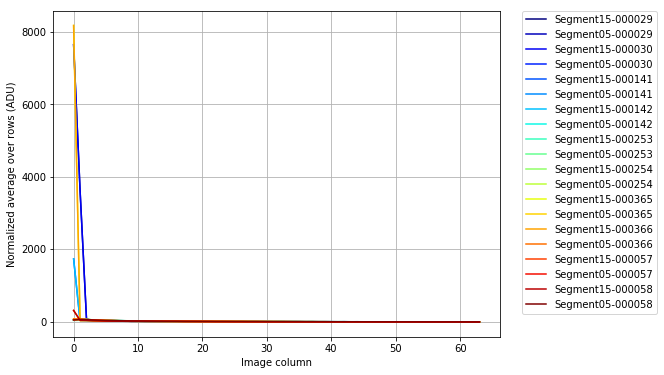

In [78]:
average_1D_plot(lfexp20, [5, 10], axis=0, listlabel=lb20, ROIcols=slice(colstop, colover), ROIrows=slice(50,1950))